# Tutorial

In [1]:
import os
import sonia
from sonia.sonia_leftpos_rightpos import SoniaLeftposRightpos
from sonia.plotting import Plotter
from sonia.evaluate_model import EvaluateModel
from sonia.sequence_generation import SequenceGeneration
import numpy as np
import pandas as pd

## load lists of sequences with gene specification

In [2]:
# this assume data sequences are in semi-colon separated text file, with gene specification
data_seqs = list(pd.read_csv('data_seqs.csv.gz').values.astype(np.str))
data_seqs[:3]

[array(['CASSKQGASEAFF', 'TRBV7-8', 'TRBJ1-1'], dtype='<U26'),
 array(['CASSPPPNYGYTF', 'TRBV6-1', 'TRBJ1-2'], dtype='<U26'),
 array(['CASSTDTTEAFF', 'TRBV6-5', 'TRBJ1-1'], dtype='<U26')]

## define and infer model

In [3]:
qm = SoniaLeftposRightpos(data_seqs=data_seqs,chain_type='humanTRB')

  1%|          | 1449/200000 [00:00<00:13, 14488.42it/s]

Encode data.


100%|██████████| 200000/200000 [00:14<00:00, 13918.58it/s]


In [4]:
# add generated sequences (you can add them from file too, more is better.)
qm.add_generated_seqs(int(2e5)) 

  1%|          | 1824/200000 [00:00<00:21, 9184.30it/s]

Generate sequences.


  1%|▏         | 2944/200000 [00:00<00:13, 14349.60it/s]

Encode gen.


100%|██████████| 200000/200000 [00:13<00:00, 14425.46it/s]


In [5]:
#define and train model
qm.infer_selection(epochs=30)

## do some plotting

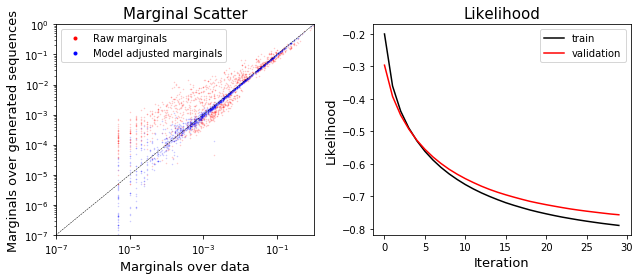

In [6]:
plot_sonia=Plotter(qm)
plot_sonia.plot_model_learning()

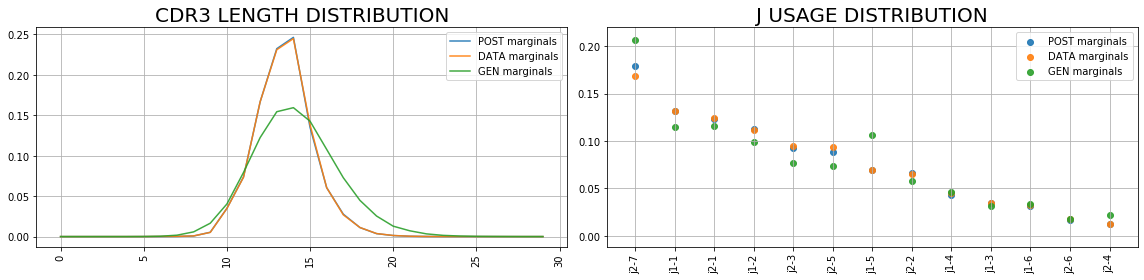

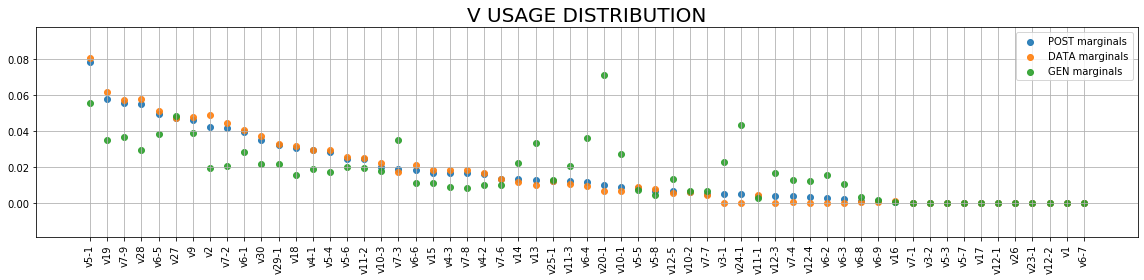

In [7]:
plot_sonia.plot_vjl()

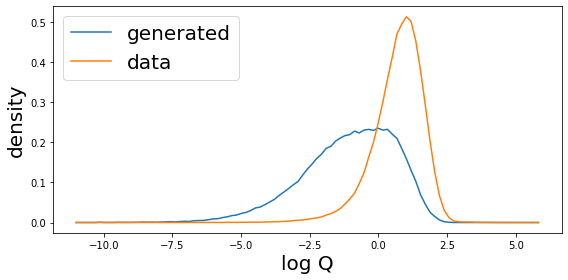

In [8]:
plot_sonia.plot_logQ()

## generate sequences

In [9]:
gn=SequenceGeneration(qm)

In [10]:
pre_seqs=gn.generate_sequences_pre(int(1e4))
pre_seqs[:3]

[['CASTGLDTEAFF', 'TRBV9', 'TRBJ1-1', 'TGTGCCAGCACAGGGCTTGACACTGAAGCTTTCTTT'],
 ['CASSALPGQNLNTEAFF',
  'TRBV5-4',
  'TRBJ1-1',
  'TGTGCCAGCAGCGCCCTTCCCGGGCAAAATTTGAACACTGAAGCTTTCTTT'],
 ['CASSFLKEGALYGYTF',
  'TRBV11-3',
  'TRBJ1-2',
  'TGTGCCAGCAGCTTTCTCAAAGAGGGGGCCCTCTATGGCTACACCTTC']]

In [11]:
post_seqs=gn.generate_sequences_post(int(1e4))
post_seqs[:3]

array([['CAIVMVARIDTQYF', 'TRBV9', 'TRBJ2-3',
        'TGTGCCATTGTGATGGTAGCGAGGATAGATACGCAGTATTTT'],
       ['CASSPSSSLTNYGYTF', 'TRBV4-2', 'TRBJ1-2',
        'TGTGCCAGCAGCCCCAGTTCGAGCCTCACTAACTATGGCTACACCTTC'],
       ['CASSELLVWDRVGNEQFF', 'TRBV2', 'TRBJ2-1',
        'TGTGCCAGCAGTGAACTACTCGTCTGGGACAGGGTTGGCAATGAGCAGTTCTTC']],
      dtype='<U96')

## evaluate sequences

In [12]:
ev=EvaluateModel(qm)

In [13]:
Q_data,pgen_data,ppost_data=ev.evaluate_seqs(qm.data_seqs[:int(1e4)])
Q_gen,pgen_gen,ppost_gen=ev.evaluate_seqs(pre_seqs)
Q_model,pgen_model,ppost_model=ev.evaluate_seqs(post_seqs)
print(Q_model[:3]),
print(pgen_model[:3])
print(ppost_model[:3])

[0.77306277 3.2957966  0.80261236]
[3.34611302e-16 2.71243768e-12 1.90287780e-14]
[2.58675539e-16 8.93964296e-12 1.52727325e-14]


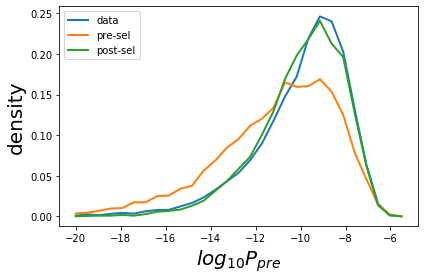

In [14]:
plot_sonia.plot_prob(data=pgen_data,gen=pgen_gen,model=pgen_model,ptype='P_{pre}')

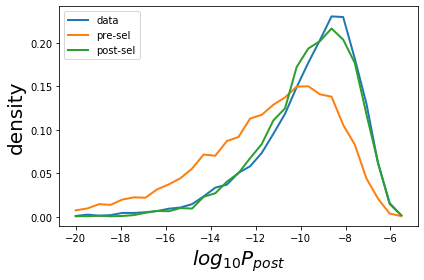

In [15]:
plot_sonia.plot_prob(ppost_data,ppost_gen,ppost_model,ptype='P_{post}')

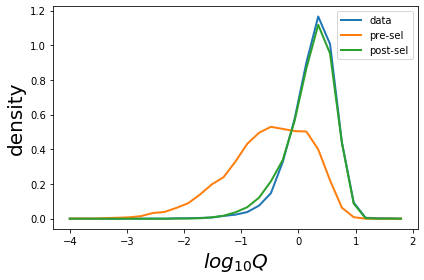

In [16]:
plot_sonia.plot_prob(Q_data,Q_gen,Q_model,ptype='Q',bin_min=-4,bin_max=2)

## some utils from OLGA

In [17]:
# evaluation and selection models import olga classes, that can be used for additional analyses.

In [18]:
gn.seq_gen_model.gen_rnd_prod_CDR3()

('TGTGCCAGCAGCTTATTGAGTACGGGACAGGGGCAAAGAGCTTTCTTT', 'CASSLLSTGQGQRAFF', 69, 0)

In [19]:
gn.genomic_data.genJ[1]

['TRBJ1-2*01',
 'CTAACTATGGCTACACCTTC',
 'CTAACTATGGCTACACCTTCGGTTCGGGGACCAGGTTAACCGTTGTAG']

In [20]:
ev.pgen_model.PinsDJ

array([6.17437e-02, 3.61889e-02, 9.09608e-02, 1.05828e-01, 1.37586e-01,
       1.14643e-01, 9.60481e-02, 8.14864e-02, 6.38634e-02, 4.92164e-02,
       3.93751e-02, 2.90524e-02, 2.30059e-02, 1.64381e-02, 1.45157e-02,
       1.13759e-02, 5.79127e-03, 5.97164e-03, 3.92779e-03, 2.96191e-03,
       2.04381e-03, 2.48417e-03, 9.09996e-04, 1.35102e-03, 2.44798e-04,
       4.52171e-04, 9.17052e-04, 6.28282e-04, 0.00000e+00, 1.41295e-05,
       9.74155e-04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])

## load default sonia models

In [21]:
# load default model (human TRA)
model_dir=os.path.join(os.path.dirname(sonia.sonia_leftpos_rightpos.__file__),'default_models','human_T_alpha')
qm=SoniaLeftposRightpos(load_dir=model_dir,chain_type='human_T_alpha')

Cannot find data_seqs.tsv  --  no data seqs loaded.
Cannot find gen_seqs.tsv  --  no generated seqs loaded.


In [22]:
sq=SequenceGeneration(sonia_model=qm)
# generate seqs pre
seqs=sq.generate_sequences_pre(10)
# generate seqs post
seqs = sq.generate_sequences_post(10)
print(seqs)

[['CALSRVTGGGNKLTF' 'TRAV19' 'TRAJ10'
  'TGTGCTCTGTCCAGGGTCACGGGAGGAGGAAACAAACTCACCTTT']
 ['CALSDLRSDGQKLLF' 'TRAV9-2' 'TRAJ16'
  'TGTGCTCTGAGTGATCTACGGTCAGATGGCCAGAAGCTGCTCTTT']
 ['CAAKTGTASKLTF' 'TRAV13-1' 'TRAJ44'
  'TGTGCAGCAAAAACCGGCACTGCCAGTAAACTCACCTTT']
 ['CAMREVDTVSGGYNKLIF' 'TRAV14/DV4' 'TRAJ4'
  'TGTGCAATGAGAGAGGTAGATACGGTTTCTGGTGGCTACAATAAGCTGATTTTT']
 ['CAAIPNNNARLMF' 'TRAV23/DV6' 'TRAJ31'
  'TGTGCAGCAATCCCGAATAACAATGCCAGACTCATGTTT']
 ['CALEESSASKIIF' 'TRAV6' 'TRAJ3'
  'TGTGCTCTAGAAGAGAGCAGTGCTTCCAAGATAATCTTT']
 ['CAVRDPNQGGKLIF' 'TRAV1-1' 'TRAJ23'
  'TGCGCTGTGAGAGATCCGAACCAGGGAGGAAAGCTTATCTTC']
 ['CAVRVNNNARLMF' 'TRAV1-1' 'TRAJ31'
  'TGCGCTGTGAGAGTGAATAACAATGCCAGACTCATGTTT']
 ['CAVFGNAGGTSYGKLTF' 'TRAV36/DV7' 'TRAJ52'
  'TGTGCTGTGTTTGGTAATGCTGGTGGTACTAGCTATGGAAAGCTGACATTT']
 ['CAACSQGGSEKLVF' 'TRAV13-1' 'TRAJ57'
  'TGTGCAGCATGCTCTCAGGGCGGATCTGAAAAGCTGGTCTTT']]
